In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import  StandardScaler, LabelEncoder, OneHotEncoder, LabelBinarizer, MinMaxScaler
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
import tensorflow as tf

from keras.models import Sequential,load_model
from keras.layers import Dense, LSTM, SimpleRNN, Dropout, GaussianNoise, Activation
from keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical 
from keras.wrappers.scikit_learn import KerasClassifier

from numpy import loadtxt

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('PCA/PCA_Dataset.xlsx')
df.head()

C:\Users\Alext\anaconda3\envs\ML\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Sample,SOCCS.ID=SOCCSID.x,Plate,GP1,GP2,GP3,GP4,GP5,GP6,GP7,...,T.stage,N.stage,M.stage,IJCC Stage: All source files,Years since diagnosis,PCA dimension 0,PCA dimension 1,PCA dimension 2,PCA dimension 3,PCA dimension 4
0,CRC_1924,268500098,17,0.11,0.34,0.34,27.70,0.30,6.74,0.44,...,T2,N0,M0,1,0.153425,-5.136120,0.098171,1.560246,-0.025347,-0.162695
1,CRC_2411,270200098,3,0.76,0.94,0.37,17.82,0.46,4.07,1.37,...,T3,N1,M0,3,0.410959,5.702060,0.268294,-0.092834,2.679249,0.621223
2,CRC_2432,270700098,3,0.19,0.42,0.41,23.71,0.29,4.82,0.46,...,T3,N1,M0,3,0.312329,0.682972,2.450636,0.909716,0.272873,0.841800
3,CRC_2460,271900098,3,0.15,0.36,0.32,17.95,0.24,5.08,0.36,...,T4,N0,M0,2,0.369863,7.155556,-0.577662,3.854688,-2.132542,-1.402600
4,CRC_2461,21200005,2,0.09,0.71,0.32,19.23,0.31,5.15,0.85,...,T3,N0,M0,2,1.136986,4.374634,1.523309,-1.772232,1.980267,2.139741


Text(0.5, 0, 'PCA dimension 0 [-]')

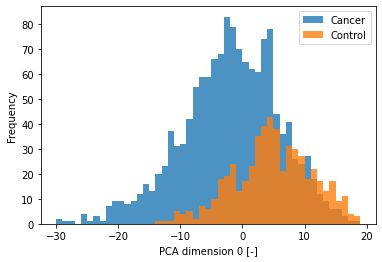

In [3]:
#Check PCA distribution
fig, axs = plt.subplots()
#axs.scatter(df["PCA dimension 0"], df["PCA dimension 1"], alpha=0.8, c=color, edgecolors='none', s=30, label=group)
df.groupby('Status')['PCA dimension 0'].plot(kind='hist', bins=range(-30, 20), ax=axs, legend=True, alpha=0.8)
axs.set_xlabel("PCA dimension 0 [-]") 

Text(0.5, 0, 'PCA dimension 1 [-]')

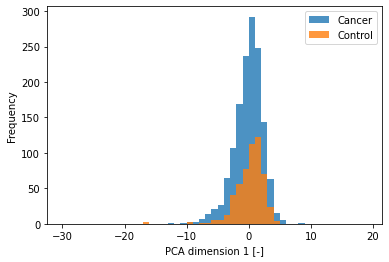

In [4]:
#Check PCA distribution
fig, axs = plt.subplots()
#axs.scatter(df["PCA dimension 0"], df["PCA dimension 1"], alpha=0.8, c=color, edgecolors='none', s=30, label=group)
df.groupby('Status')['PCA dimension 1'].plot(kind='hist', bins=range(-30, 20), ax=axs, legend=True, alpha=0.8)
axs.set_xlabel("PCA dimension 1 [-]") 

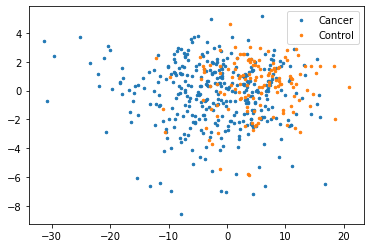

In [5]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('Status')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group["PCA dimension 0"], group["PCA dimension 1"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

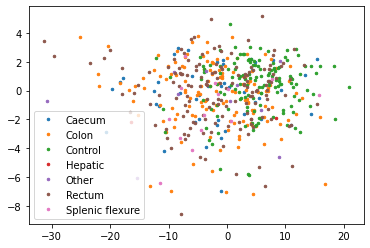

In [6]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('Tumour location')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group["PCA dimension 0"], group["PCA dimension 1"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

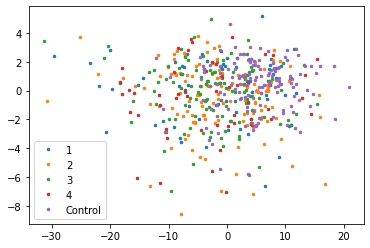

In [7]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('IJCC Stage: All source files')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group["PCA dimension 0"], group["PCA dimension 1"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

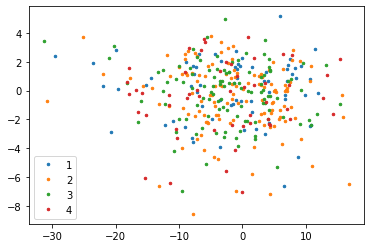

In [8]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('IJCC Stage: All source files')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    if name != 'Control':
        ax.plot(group["PCA dimension 0"], group["PCA dimension 1"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

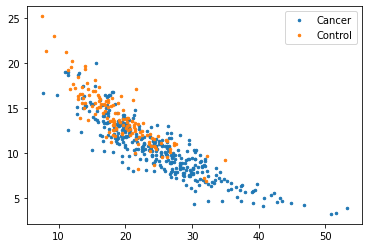

In [9]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('Status')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group["GP4"], group["GP14"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

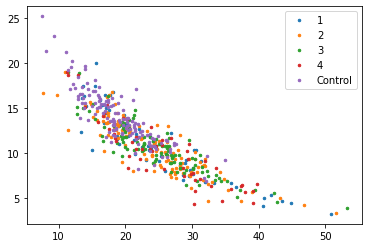

In [10]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('IJCC Stage: All source files')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group["GP4"], group["GP14"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

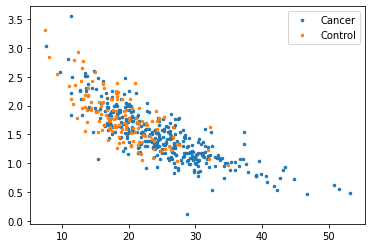

In [11]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('Status')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group["GP4"], group["GP15"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

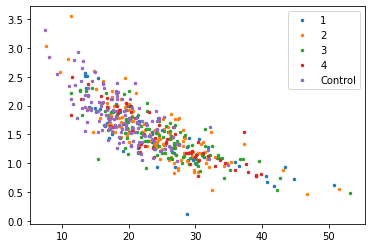

In [12]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('IJCC Stage: All source files')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group["GP4"], group["GP15"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

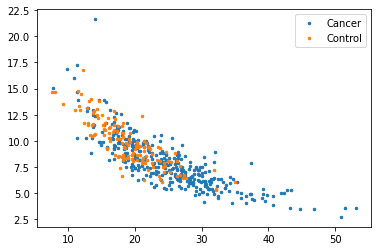

In [13]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('Status')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group["GP4"], group["GP18"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

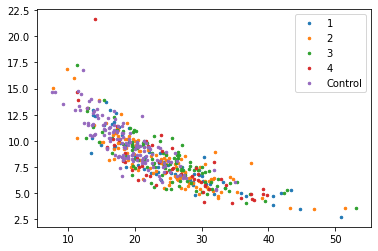

In [14]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('IJCC Stage: All source files')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group["GP4"], group["GP18"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

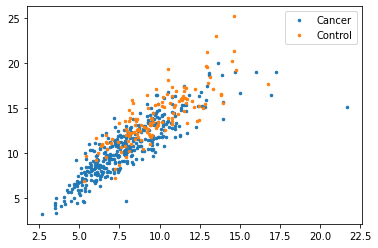

In [15]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('Status')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group["GP18"], group["GP14"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

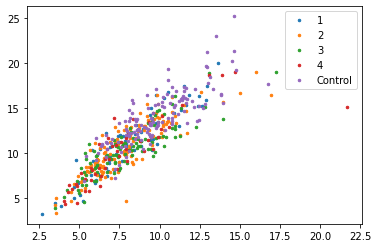

In [16]:
df_sampled=df.sample(n=500, random_state=100)
groups = df_sampled.groupby('IJCC Stage: All source files')
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group["GP18"], group["GP14"], marker='.', linestyle='', ms=5, label=name)
    
ax.legend()

plt.show()

In [17]:
df.groupby('Status')[["PCA dimension 0", "PCA dimension 1"]].describe()

PCA dimension 0                                                     \
                  count      mean       std        min       25%       50%   
Status                                                                       
Cancer           1419.0 -1.886717  7.967968 -31.267500 -6.803745 -1.629418   
Control           538.0  4.976305  6.409522 -13.242475  1.051840  4.828664   

                             PCA dimension 1                                 \
              75%        max           count      mean       std        min   
Status                                                                        
Cancer   3.637143  20.671541          1419.0 -0.078054  2.280118 -12.614554   
Control  9.271785  20.782014           538.0  0.205872  2.285358 -16.992247   

                                                 
              25%       50%       75%       max  
Status                                           
Cancer  -1.359074  0.235315  1.422246  8.176201  
Control -0.924981  0.552926  1.642177  4.911305

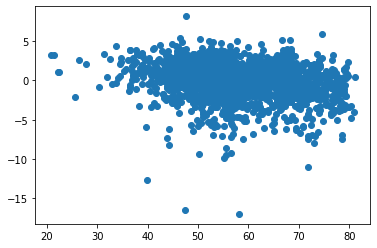

In [18]:
fig, axs = plt.subplots() 
axs.scatter(df['Age at sample'], df['PCA dimension 1'])

In [19]:
model = load_model('ANN Models/all_inputs_balanced_studysubset_model.h5')
model.summary()

Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_342 (Dense)            (None, 16)                432       
_________________________________________________________________
activation_342 (Activation)  (None, 16)                0         
_________________________________________________________________
dropout_228 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_343 (Dense)            (None, 16)                272       
_________________________________________________________________
activation_343 (Activation)  (None, 16)                0         
_________________________________________________________________
dropout_229 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_344 (Dense)            (None, 2)              

In [23]:
def data():
    #define input processing function
    def process_attributes(df, train, test):
        
        #define and fit the scaler to the full dataset
        cs = MinMaxScaler()
        cs.fit(df.select_dtypes(np.number))
        
        #scale the numerical input variables
        trainContinuous = cs.transform(train.select_dtypes(np.number))
        testContinuous = cs.transform(test.select_dtypes(np.number))
        
        if 'Gender' in df.columns:
            
            #uncomment the code below to accommodate for any categorical columns
            zipBinarizer = LabelBinarizer().fit(df["Gender"])
            trainCategorical = zipBinarizer.transform(train["Gender"])
            testCategorical = zipBinarizer.transform(test["Gender"])

            # construct our training and testing data points by concatenating
            # the categorical features with the continuous features
            trainX = np.hstack([trainContinuous, trainCategorical])
            testX = np.hstack([testContinuous, testCategorical])
            
        else:
            trainX=trainContinuous
            testX=testContinuous
        
        # return the concatenated training and testing data
        return (trainX, testX)
    
    #read the excel datasets
    df = pd.read_excel('PCA/PCA_Dataset.xlsx')
    df.set_index('Sample',inplace=True)
    features=df.columns

    df_cancer = df.loc[df['Status'] == 'Cancer']
    df_control = df.loc[df['Status'] == 'Control']

    #randomly seelct 538 samples from the cancer population to create an equal sample size 
    df_cancer_small = df_cancer.sample(n=538, random_state = 100)

    df1 = pd.concat([df_cancer_small, df_control])
    #separate cancer markers and input data
    df_outputs= df1['Status']
    df_inputs = df1.drop(['Status'],axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_outputs, random_state=100, stratify=df_outputs, test_size=0.3)
    df_inputs_2=df_inputs.drop(['PCA dimension 0', 'PCA dimension 1', 'PCA dimension 2', 'PCA dimension 3', 'PCA dimension 4', 'IJCC Stage: All source files', 
                                'SOCCS.ID=SOCCSID.x', 'Study.ID', 'Age at Cancer Diagnosis', 'Years since diagnosis', 'Plate', 'BMI combined files'],axis=1)
    X_train_2=X_train.drop(['PCA dimension 0', 'PCA dimension 1', 'PCA dimension 2', 'PCA dimension 3', 'PCA dimension 4', 'IJCC Stage: All source files', 
                            'SOCCS.ID=SOCCSID.x', 'Study.ID', 'Age at Cancer Diagnosis', 'Years since diagnosis', 'Plate', 'BMI combined files'],axis=1)
    X_test_2=X_test.drop(['PCA dimension 0', 'PCA dimension 1', 'PCA dimension 2', 'PCA dimension 3', 'PCA dimension 4', 'IJCC Stage: All source files', 
                          'SOCCS.ID=SOCCSID.x', 'Study.ID', 'Age at Cancer Diagnosis', 'Years since diagnosis', 'Plate', 'BMI combined files'],axis=1)
    #process the input sets
    (X_train_sc, X_test_sc) = process_attributes(df_inputs_2, X_train_2, X_test_2)
    
    #encode the categorical output variables
    #encode categorical outputs
    lb = LabelBinarizer()
    lb.fit(y_train)
    train_outputs= lb.transform(y_train)
    test_outputs= lb.transform(y_test)

    Y_train = tf.keras.utils.to_categorical(train_outputs)
    Y_test = tf.keras.utils.to_categorical(test_outputs)

    return X_train_sc, Y_train, X_test_sc, Y_test, lb, features, X_test, y_test

In [24]:
#call in data function for test evaluation later
X_train, Y_train, X_test, Y_test, lb, features, test_inputs_not_transfotmed, test_outputs_not_transfotmed = data()
features

C:\Users\Alext\anaconda3\envs\ML\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Index(['SOCCS.ID=SOCCSID.x', 'Plate', 'GP1', 'GP2', 'GP3', 'GP4', 'GP5', 'GP6',
       'GP7', 'GP8', 'GP9', 'GP10', 'GP11', 'GP12', 'GP13', 'GP14', 'GP15',
       'GP16', 'GP17', 'GP18', 'GP19', 'GP20', 'GP21', 'GP22', 'GP23', 'GP24',
       'Study.ID', 'Gender', 'Age at sample', 'Status',
       'Age at Cancer Diagnosis', 'BMI combined files', 'Tumour location',
       'T.stage', 'N.stage', 'M.stage', 'IJCC Stage: All source files',
       'Years since diagnosis', 'PCA dimension 0', 'PCA dimension 1',
       'PCA dimension 2', 'PCA dimension 3', 'PCA dimension 4'],
      dtype='object')

In [25]:
#Calculate the labels for the test set
predictions = model.predict(X_test)

In [26]:
#evaluate test performance of the model
print('Cancer is encoded by',lb.transform(['Cancer']), ', while Control is encoded by',lb.transform(['Control']))
print(confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(predictions, axis=1)))
print(classification_report(np.argmax(Y_test, axis=1), np.argmax(predictions, axis=1), target_names=lb.classes_))

Cancer is encoded by [[0]] , while Control is encoded by [[1]]
[[110  52]
 [ 49 112]]
              precision    recall  f1-score   support

      Cancer       0.69      0.68      0.69       162
     Control       0.68      0.70      0.69       161

    accuracy                           0.69       323
   macro avg       0.69      0.69      0.69       323
weighted avg       0.69      0.69      0.69       323



In [27]:
result = pd.concat([test_inputs_not_transfotmed, test_outputs_not_transfotmed], axis=1)
result.head()

,SOCCS.ID=SOCCSID.x,Plate,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,...,N.stage,M.stage,IJCC Stage: All source files,Years since diagnosis,PCA dimension 0,PCA dimension 1,PCA dimension 2,PCA dimension 3,PCA dimension 4,Status
Sample,,,,,,,,,,,,,,,,,,,,,
CRC_8611,191520301,17,0.05,0.22,0.24,12.04,0.18,2.54,0.51,20.42,...,Control,Control,Control,NaN,14.649366,2.849852,2.584644,-0.910495,-2.500434,Control
CRC_3265,4400001,10,0.17,0.44,0.33,25.21,0.22,5.63,0.34,18.82,...,N1,M0,3,0.106849,-2.141175,1.275390,-0.420574,0.963946,1.082731,Cancer
CRC_3778,148300023,10,0.10,0.30,0.19,18.08,0.18,5.07,0.40,18.57,...,N0,M0,1,1.013699,7.088240,0.673744,1.391102,-1.474943,0.851280,Cancer
CRC_9471,122320225,22,0.14,0.22,0.28,14.08,0.24,3.19,0.45,17.76,...,Control,Control,Control,NaN,12.131154,1.422184,3.307928,-0.080170,0.526287,Control
CRC_5091,109600003,13,0.17,0.50,0.25,31.46,0.37,5.86,0.56,19.70,...,N2,M0,3,-0.205479,-8.889537,1.919948,-0.971656,-1.260231,-1.194069,Cancer


In [28]:
# keep probabilities for the positive outcome only
positive_prb = predictions[:, 1]
result['Square residuals']=(positive_prb-np.argmax(Y_test, axis=1))**2
result['Prediction']=np.argmax(predictions, axis=1)
result['Actual']=np.argmax(Y_test, axis=1)
result.head()

,SOCCS.ID=SOCCSID.x,Plate,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,...,Years since diagnosis,PCA dimension 0,PCA dimension 1,PCA dimension 2,PCA dimension 3,PCA dimension 4,Status,Square residuals,Prediction,Actual
Sample,,,,,,,,,,,,,,,,,,,,,
CRC_8611,191520301,17,0.05,0.22,0.24,12.04,0.18,2.54,0.51,20.42,...,NaN,14.649366,2.849852,2.584644,-0.910495,-2.500434,Control,0.142871,1,1
CRC_3265,4400001,10,0.17,0.44,0.33,25.21,0.22,5.63,0.34,18.82,...,0.106849,-2.141175,1.275390,-0.420574,0.963946,1.082731,Cancer,0.425777,1,0
CRC_3778,148300023,10,0.10,0.30,0.19,18.08,0.18,5.07,0.40,18.57,...,1.013699,7.088240,0.673744,1.391102,-1.474943,0.851280,Cancer,0.750681,1,0
CRC_9471,122320225,22,0.14,0.22,0.28,14.08,0.24,3.19,0.45,17.76,...,NaN,12.131154,1.422184,3.307928,-0.080170,0.526287,Control,0.024399,1,1
CRC_5091,109600003,13,0.17,0.50,0.25,31.46,0.37,5.86,0.56,19.70,...,-0.205479,-8.889537,1.919948,-0.971656,-1.260231,-1.194069,Cancer,0.012232,0,0


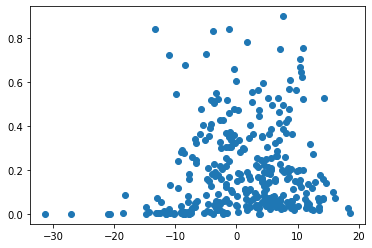

In [29]:
fig, axs = plt.subplots() 
axs.scatter(result['PCA dimension 0'], result['Square residuals'])

In [30]:
with pd.ExcelWriter('PCA/PCA_Predictions_Dataset.xlsx') as writer:
    result.to_excel(writer, sheet_name='Combined', index = True)